In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
train_img_path  = "../data/Training-Dataset/Images/"
train_mask_path = "../data/Training-Dataset/Masks-Ideal/"
validation_img_path  = "../data/Validation-Dataset/Images/"
validation_mask_path = "../data/Validation-Dataset/Masks-Ideal/"

In [3]:
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images[filename.split('.')[0]] = img  #remove extension from file name
    return images

In [4]:
images = load_images_from_folder(train_img_path)
masks  = load_images_from_folder(train_mask_path)

valid_images = load_images_from_folder(validation_img_path)
valid_masks  = load_images_from_folder(validation_mask_path)

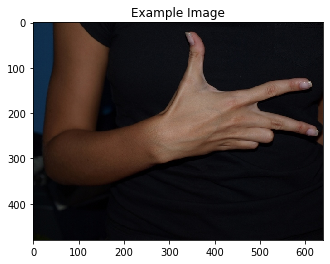

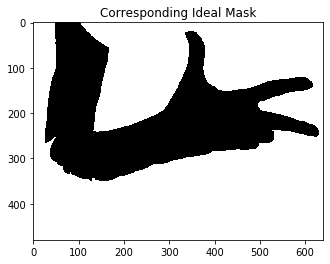

In [5]:
plt.title("Example Image")
plt.imshow(cv2.cvtColor(images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Corresponding Ideal Mask")
plt.imshow(cv2.cvtColor(masks['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
def skinDetection(image, mask, value = 255):
    mask_skin = mask != 0
    img = image.copy()
    img[mask_skin] = value
    return img

In [7]:
def nonSkinDetection(image, mask, value = 255):
    mask_non_skin = mask == 0
    img = image.copy()
    img[mask_non_skin]= value
    return img

In [8]:
def removeNoise(image):
    kernel_size = 5
    return cv2.GaussianBlur(image,(kernel_size, kernel_size),0)

In [9]:
def modifyColorSpace(images, change):
    images_ = {}
    for key in images.keys():
        image = images[key].copy()
        image = cv2.cvtColor(image, change)
        images_[key] = image
    return images_

In [10]:
def histogram2DCharacterization(images, channels, min_value, max_value, bins, plot=True, save=""):
    interval=[[min_value,max_value],[min_value,max_value]] # Histogram value's range
    global_hist = np.eye(bins)*0                           # Define number of bins

    for key in images.keys():
        image_copy = images[key].copy()
        
        x = image_copy[:,:,channels[0]].flatten()
        y = image_copy[:,:,channels[1]].flatten()
        
        hist, _, _ = np.histogram2d(x, y, bins=bins, range=interval)
        global_hist += hist.T

    if plot:
        extent = [min_value,max_value,min_value,max_value]
        plt.clf()
        plt.imshow(global_hist, extent=extent, origin='lower')
        plt.colorbar()
        if len(save) > 0:plt.savefig(save)
        else: plt.show()
    
    
    return global_hist

In [11]:
skin_images = {}
for key in images.keys():
    skin_images[key] = skinDetection(images[key], masks[key])

In [12]:
non_skin_images = {}
for key in images.keys():
    non_skin_images[key] = nonSkinDetection(images[key], masks[key])

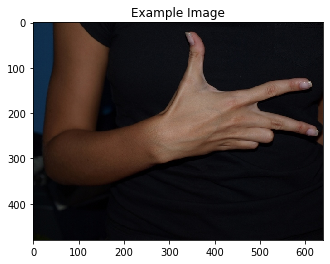

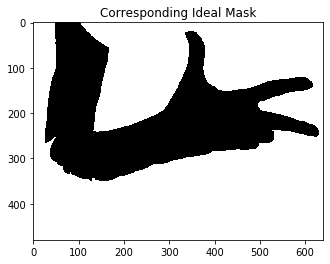

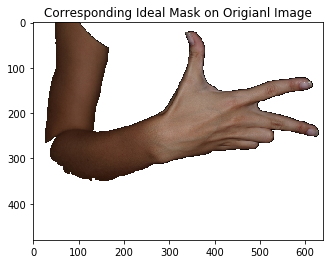

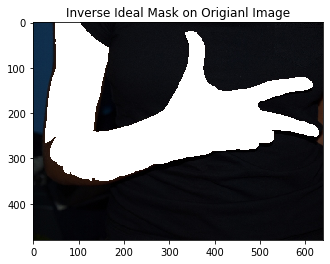

In [13]:
plt.title("Example Image")
plt.imshow(cv2.cvtColor(images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Corresponding Ideal Mask")
plt.imshow(cv2.cvtColor(masks['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Corresponding Ideal Mask on Origianl Image")
plt.imshow(cv2.cvtColor(skin_images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Inverse Ideal Mask on Origianl Image")
plt.imshow(cv2.cvtColor(non_skin_images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()

### RGB Color Space: R & B component

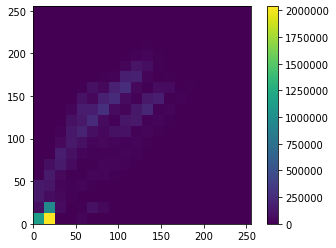

In [14]:
hist_image = histogram2DCharacterization(images, [0,2], 0, 255, 20)

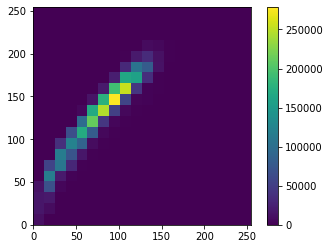

In [15]:
hist_skin = histogram2DCharacterization(skin_images, [0,2], 0, 254, 20) #remove white component (255)

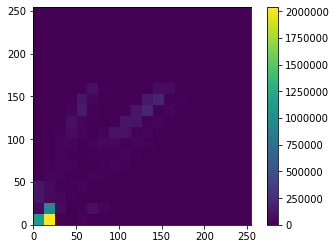

In [16]:
hist_non_skin = histogram2DCharacterization(non_skin_images, [0,2], 0, 254, 20) #remove white component (255)

### YCrCb Color Space: Cr & Cb component

In [17]:
images_ycrcb = modifyColorSpace(images, cv2.COLOR_BGR2YCrCb)

In [18]:
skin_images_ycrcb = {}
for key in images_ycrcb.keys():
    skin_images_ycrcb[key] = skinDetection(images_ycrcb[key], masks[key])

In [19]:
non_skin_images_ycrcb = {}
for key in images_ycrcb.keys():
    non_skin_images_ycrcb[key] = nonSkinDetection(images_ycrcb[key], masks[key])

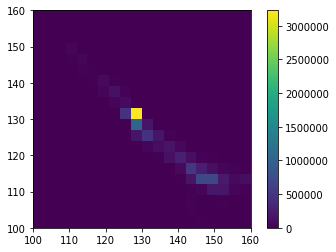

In [20]:
hist_image = histogram2DCharacterization(images_ycrcb, [1,2], 100, 160, 20)

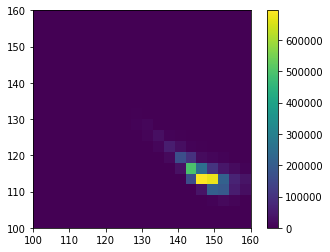

In [21]:
hist_skin = histogram2DCharacterization(skin_images_ycrcb, [1,2], 100, 160, 20) #remove white component set to 255

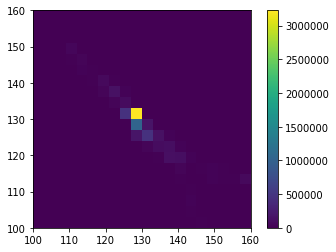

In [22]:
hist_non_skin = histogram2DCharacterization(non_skin_images_ycrcb, [1,2], 100, 160, 20) #remove white component set to255)

### HSV Color Space

In [24]:
images_hsv = modifyColorSpace(images, cv2.COLOR_BGR2HSV)

In [25]:
skin_images_hsv = {}
for key in images_hsv.keys():
    skin_images_hsv[key] = skinDetection(images_hsv[key], masks[key])

In [26]:
non_skin_images_hsv = {}
for key in images_hsv.keys():
    non_skin_images_hsv[key] = nonSkinDetection(images_hsv[key], masks[key])

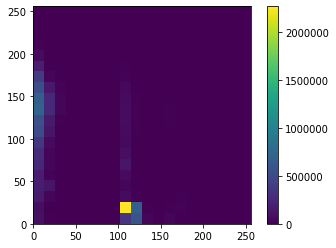

In [27]:
hist_image = histogram2DCharacterization(images_hsv, [0,2],0,256,20)

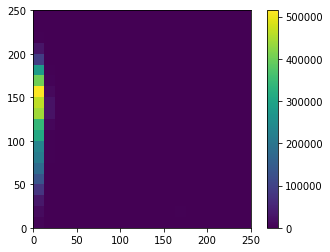

In [28]:
hist_skin = histogram2DCharacterization(skin_images_hsv, [0,2],0,250,20)

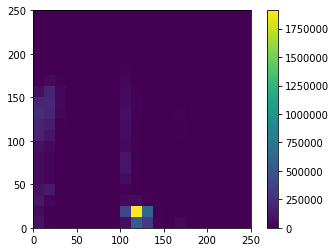

In [29]:
hist_non_skin = histogram2DCharacterization(non_skin_images_hsv, [0,2],0,250,20)